
# EDA on the 2014 Survey Dataset

## 01 Basic Overview of the Dataset

In [8]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import seaborn as sns
import plotly.express as px

In [16]:
# Loading the dataset and overview
df = pd.read_csv("datasets/2014_survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [17]:
# Attribute names
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

**Understanding the attributes**

The dataset contains the attributes which correspond to the following survey questions:
- ```Timestamp```
- ```Age```
- ```Gender```
- ```Country```
- ```state```: If you live in the United States, which state or territory do you live in?
- ```self_employed```: Are you self-employed?
- ```family_history```: Do you have a family history of mental illness?
- ```treatment```: Have you sought treatment for a mental health condition?
- ```work_interfere```: If you have a mental health condition, do you feel that it interferes with your work?
- ```no_employees```: How many employees does your company or organization have?
- ```remote_work```: Do you work remotely (outside of an office) at least 50% of the time?
- ```tech_company```: Is your employer primarily a tech company/organization?
- ```benefits```: Does your employer provide mental health benefits?
- ```care_options```: Do you know the options for mental health care your employer provides?
- ```wellness_program```: Has your employer ever discussed mental health as part of an employee wellness program?
- ```seek_help```: Does your employer provide resources to learn more about mental health issues and how to seek help?
- ```anonymity```: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- ```leave```: How easy is it for you to take medical leave for a mental health condition?
- ```mentalhealthconsequence```: Do you think that discussing a mental health issue with your employer would have negative consequences?
- ```physhealthconsequence```: Do you think that discussing a physical health issue with your employer would have negative consequences?
- ```coworkers```: Would you be willing to discuss a mental health issue with your coworkers?
- ```supervisor```: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- ```mentalhealthinterview```: Would you bring up a mental health issue with a potential employer in an interview?
- ```physhealthinterview```: Would you bring up a physical health issue with a potential employer in an interview?
- ```mentalvsphysical```: Do you feel that your employer takes mental health as seriously as physical health?
- ```obs_consequence```: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- ```comments```: Any additional notes or comments

In [18]:
# Basic properties of the dataset
print("Shape:", df.shape)
df.describe()

Shape: (1259, 27)


,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [19]:
# View the properties of the attributes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## 02 Overview Analysis
From a high vantage point of the dataset, we determine that it consists of 1259 records and 27 attributes. The `Age` attribute is the only integer typed one, with all others being objects. `comments` has the most number of `null` values, far outnumbering the other attributes with `null` values - `state`, `work_interference` and `self_employed`. 

**Inferences and Thoughts**
- It makes sense that few participants would contribute to additional commenting. 
- The lack of answers in `state` could be attributed to people outside the US. Further calculation regarding the number of people who did live in the US and yet did not provide an answer here would yield the true `null` values.
- How many participants were undecided on the question of whether their mental health condition interferes with their work?

## 03 Data Preprocessing

#### 01 Dealing with the `Age` attribute

In [ ]:
plt.rcParams["figure.figsize"] = (12, 6)
age = sns.countplot(data=df, x='Age')
age.set_title('Analyzing attribute Age before preprocessing')
age.set_xticklabels(age.get_xticklabels(), rotation=40, ha="right")
plt.xticks(rotation=45)
plt.show()

In [ ]:
for i in range(df.shape[0]):
    if df['Age'][i]>100 or df['Age'][i]<1:
        #df.drop(labels=[i],axis=0,inplace=True)
        print('yes')

Viewing the age values

In [10]:
df['Age'].unique()

NameError: name 'df' is not defined

Remove unnatural age values

In [ ]:
index_names = df[ (df['Age'] >= 110) | (df['Age'] <= 0)].index
df.drop(index_names,inplace=True)
df['Age'].unique()

Counting  unique values of age. The resulting object will be in descending order so that the first element is the most frequently-occurring element.

In [ ]:
df['Age'].value_counts()

##COUNTRY COLUMN

In [ ]:
df['Country'].value_counts()

##GENDER COLUMN

Viewing gender column before preprocessing



In [ ]:
df['Gender'].value_counts()

In [ ]:
df['Gender'].value_counts().plot(kind='pie')

Notations used in gender column

In [ ]:
df['Gender'].unique()

Preprocesiing gender column

In [ ]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

After preprocessing gender column

In [11]:
df['Gender'].value_counts().plot(kind='pie')

NameError: name 'df' is not defined

In [ ]:
df['Gender']

Kernel Density Estimation plot 

In [ ]:
df.groupby('Gender').Age.plot(kind='kde')

Histogram for gender column

In [ ]:
df.groupby('Gender').Age.hist()

Frequency for age column

In [ ]:
plt.figure(figsize = (9,3))
plt.hist(df['Age'], bins = 50)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("{} distribution with hist".format('age'))
plt.show()

Calculating the total number of missing values in each column of the DataFrame

In [12]:
df.isnull().sum()

NameError: name 'df' is not defined

##LEAVE COLUMN

In [ ]:
df['leave'].value_counts()

In the below plot column 'leave' is grouped and is represented as a rectangular mark.

In [ ]:
temp_grp_df = df.groupby('leave').count().reset_index(drop=False)
fig = px.bar(temp_grp_df, y='Timestamp',  x='leave',labels={'Timestamp':'Count'}, title='Ease of Leave',orientation='v')
fig.show()

People with family history of metal illnes  grouped by treatment sought

In [13]:
temp_grp_df = df.groupby(['family_history','treatment']).count()
temp_grp_df.reset_index(drop=False, inplace=True)

fig = px.bar(temp_grp_df, x='family_history', y='Age', labels={'Age':'Count'}, orientation='v', color='treatment',title='People with Family History of Mental Illness Grouped by Treatment Sought' ,barmode='group')
fig.show()

NameError: name 'df' is not defined

In [ ]:
temp_grp_df = df.groupby(['mental_health_consequence','phys_health_consequence','mental_vs_physical']).count()
temp_grp_df.reset_index(drop=False, inplace=True)

fig = px.bar(temp_grp_df, x='mental_health_consequence', y='Age', labels={'Age':'Count'}, orientation='v', color='phys_health_consequence', facet_col='mental_vs_physical',barmode='group')
fig.show()

##COMMENTS COLUMN

Viewing comments after droping rows with missing values

In [ ]:
for i in df['comments'].dropna():
    print(i)

When the argument of color corresponds to non-numerical data(here yes/no), discrete colors are used.Coulmn - country is grouped and is represented as a sector of the treemap.

In [ ]:
temp_grp_df = df.groupby(['Country','treatment']).count()
temp_grp_df.reset_index(drop=False, inplace=True)

fig = px.treemap(temp_grp_df,path=['Country', 'treatment'],  color='treatment', values='Age',labels={'Age':'Count'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
def bar_plot(categ_var):
    """
        input: variable ex: "anonymity"
        output: bar plot & value count
    """
    # get feature
    var = df[categ_var]
    # count number of categorical variable
    var_value = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(var_value.index, var_value)
    plt.xticks(var_value.index, var_value.values)
    plt.ylabel("Frequency")
    plt.title(categ_var)
    plt.show()
    print(f"{categ_var}:\n{var_value}")

Bar plot for self employed,family_history.tech_company,phys_health_consquence,supervisor

In [ ]:
categorical_vars = ["self_employed","family_history","tech_company","phys_health_consequence","supervisor"]
for c in categorical_vars:
    bar_plot(c)

Treatment percentage for a mental health condition

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Get Treatment of Survey Respondents')
plt.show()

Difference in number of respondents that get treatment and no treatment(based of gender).

NameError: name 'df' is not defined

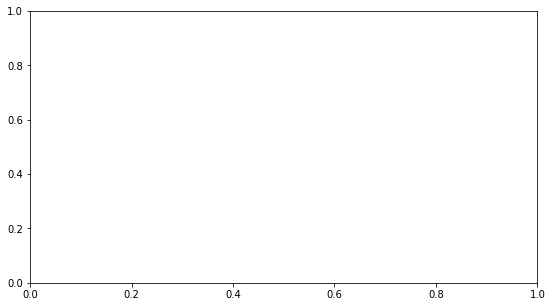

In [14]:
plt.figure(figsize = (20,5))
plt.title('Gender of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x=df['Gender'], hue = df['treatment'])
plt.title('Gender of Survey Respondents')
plt.show()

##COUNTRY COLUMN

In [ ]:
country_count = df.Country.value_counts().sort_values(ascending=False).to_frame()[:10]
country_count = country_count.rename(columns={'Country': 'count'})
plt.figure(figsize=(15,5))
ax = sns.barplot(x=country_count.index, y='count', data=country_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_title('Top 10 countries')

##STATE COLUMN

In [ ]:
state_count = df.state.value_counts().sort_values(ascending=False).to_frame()[:10]
state_count = state_count.rename(columns={'state': 'count'})
plt.figure(figsize=(10,10))
ax = sns.barplot(x=state_count.index, y='count', data=state_count,  palette="ch:.25")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_title('Top 10 States')

##NO OF EMPLOYEES COLUMN

In [ ]:
df['no_employees'].value_counts()


##TREATEMENT COLUMN

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')


##WORK_INTERFERE COLUMN

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['work_interfere'], hue = df['treatment'],  palette=dict(No = '#d95f02', Yes = '#1b9e77'))
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

##WELLNESS PROGRAM COLUMN

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['wellness_program'], hue = df['treatment'], palette='Dark2')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)